## Hacker's_Guide_To_Machine_Learning - Meeting #3: Support Vector Machines and Kernels

### Outline:

1. Review motivations and intuition for the support vector machine.
    a. Use PyCon2015 svm tutorial (Credit: Jake Vanderplas)
2. Quick presentation of the mathematical details behind the svm.
3. Introduce kernels.
4. The scikit-learn svm documentation with example implementations.

## References:

#### Jake Vanderplas PyCon2015 Tutorial
https://github.com/jakevdp/sklearn_pycon2015.git
#### Sckit-Learn Documentation
http://scikit-learn.org/stable/modules/svm.html
#### UCI Machine Learning Datasets
http://archive.ics.uci.edu/ml/
#### Kaggle Datasets
https://www.kaggle.com/datasets



### What you need to get started:

Scikit-learn requires:
1. Python (>= 2.6 or >= 3.3)
2. NumPy (>= 1.6.1)
3. SciPy (>= 0.9)

For more details regarding the installation proceedure please see:
1. http://scikit-learn.org/stable/install.html
2. http://www.scipy.org/install.html

Finally, seaborn is an excellent python visualization library which is built on matplotlib. You may need this to run some of the demos in this notebook.

https://stanford.edu/~mwaskom/software/seaborn/installing.html#installing

Note: Other alternatives to using pip, include Anaconda and Docker containers. These may simplify the installation process if you run into problems.

### Let's begin by walking through the documentation.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Automatically created module for IPython interactive environment


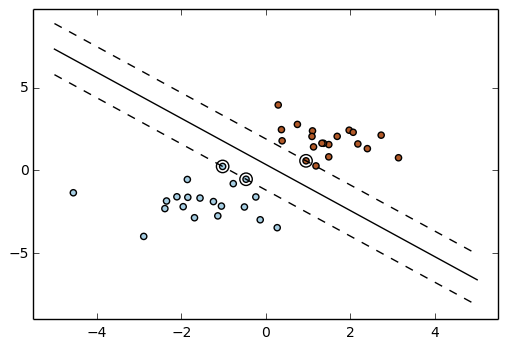

In [33]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()


Automatically created module for IPython interactive environment


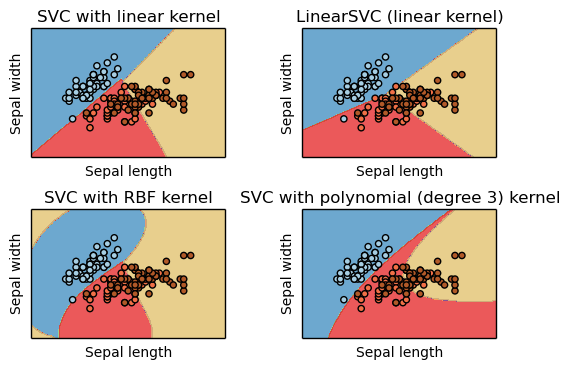

In [34]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

Automatically created module for IPython interactive environment


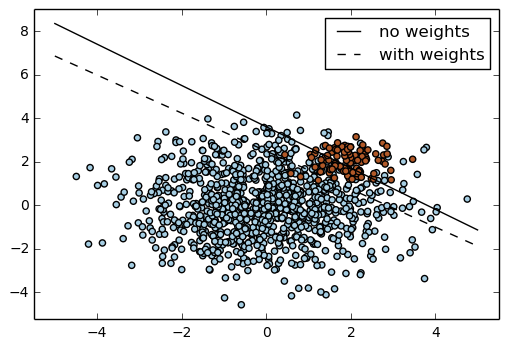

In [35]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
#from sklearn.linear_model import SGDClassifier

# we create 40 separable points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_[0] / w[1]


# get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

ww = wclf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xx - wclf.intercept_[0] / ww[1]

# plot separating hyperplanes and samples
h0 = plt.plot(xx, yy, 'k-', label='no weights')
h1 = plt.plot(xx, wyy, 'k--', label='with weights')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend()

plt.axis('tight')
plt.show()

Automatically created module for IPython interactive environment


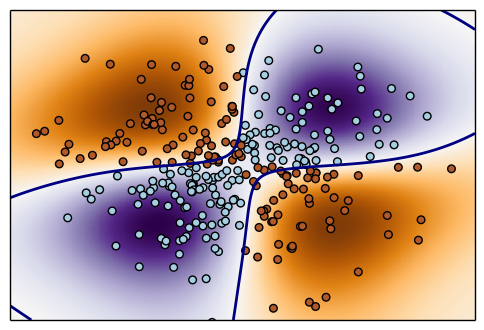

In [36]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC()
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

Automatically created module for IPython interactive environment


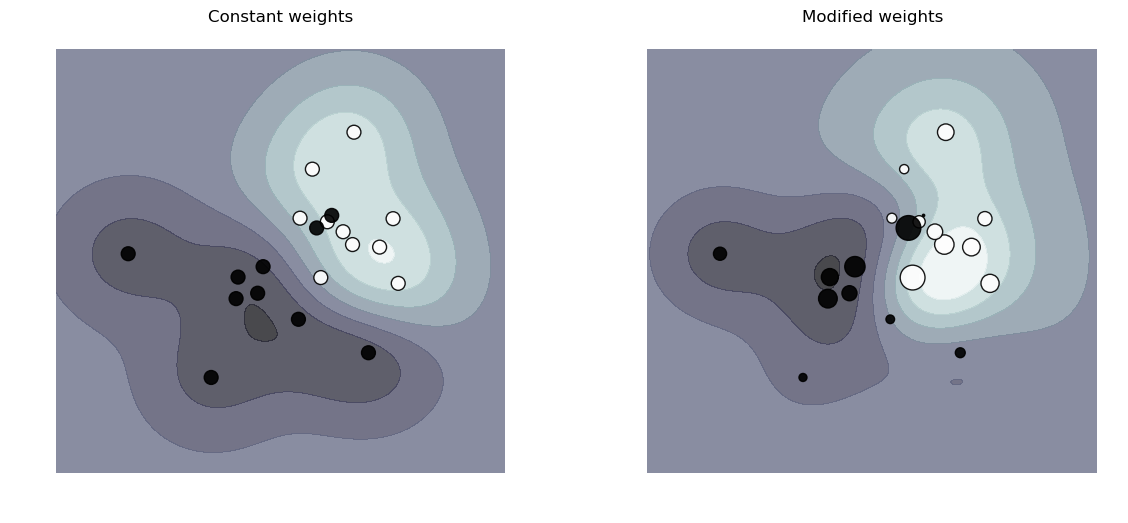

In [37]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=Y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone)

    axis.axis('off')
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
Y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# for reference, first fit without class weights

# fit the model
clf_weights = svm.SVC()
clf_weights.fit(X, Y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC()
clf_no_weights.fit(X, Y)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                       "Constant weights")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                       "Modified weights")

plt.show()

### Optical Recognition of Handwritten Digits ("The 'Hello World' of Machine learning")


In [38]:
from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

# Split data set into a training and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [39]:
from sklearn import svm
# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.97111111111111115

[[44  0  0  0  0  0  0  0  0  0]
 [ 0 49  1  0  0  0  1  0  2  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0  1]
 [ 0  0  0  0 40  0  0  2  0  0]
 [ 0  0  0  0  0 43  0  0  0  2]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 36  0]
 [ 0  0  0  1  0  1  0  0  0 46]]


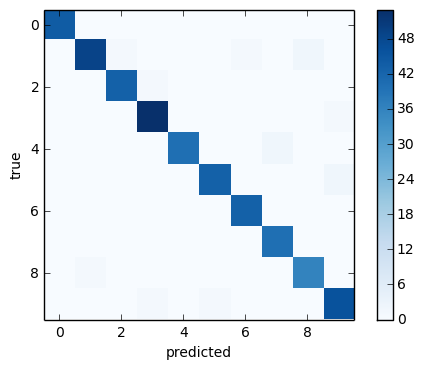

In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test ))

plt.imshow(confusion_matrix(y_pred, y_test),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

### Next Week:

#### Methods for Data Visualization and Model Validation

### Actionable Projects this Week:

#### Classification - Use the UCI database to classify tumors as benign or malignant:
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29
#### Regression - Create a Kaggle account, and predict housing prices:
https://www.kaggle.com/harlfoxem/housesalesprediction

### References and Help:

#### Pycon 2015: Pandas from the Ground Up -  Brandon Rhodes
https://www.youtube.com/watch?v=5JnMutdy6Fw&list=PLLj6w0Thbv02XzUj7u38paSY91zMzn8U8&index=2

#### PyCon 2015: Machine Learning with Scikit-Learn (I) - Jake Vanderplas
https://www.youtube.com/watch?v=L7R4HUQ-eQ0

#### Andrew Ng's Lectures on Coursera on Machine Learning (Week 7 Lectures):
https://www.youtube.com/playlist?list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW

#### Andrew Ng's Lectures at Stanford on Machine Learning (Lectures 6-8):
https://www.youtube.com/playlist?list=PLA89DCFA6ADACE599

##### Note: The coursera lectures are provide a barebones application oriented introduction to machine learning. The mathematical exposition is less formal. This is a good place to start.
